# Chi-Square Test-

The test is applied when you have two categorical variables from a single population. It is used to determine whether there is a 
significant association between the two variables

In [3]:
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

C:\Users\Rajesh Doolla\AppData\Roaming\Python\Python36\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
tips=sns.load_dataset('tips')

In [6]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [9]:
#picking the two categorical values
table=pd.crosstab(tips['sex'],tips['smoker'])
table

smoker,Yes,No
sex,,
Male,60,97
Female,33,54


In [12]:
#observed values
Observed_values=table.values
print("Observed values are:\n",Observed_values)

Observed values are:
 [[60 97]
 [33 54]]


In [18]:
value=chi2_contingency(Observed_values)

In [19]:
value

(0.008763290531773594, 0.925417020494423, 1, array([[59.84016393, 97.15983607],
        [33.15983607, 53.84016393]]))

In [31]:
expected_values=value[3]
expected_values

array([[59.84016393, 97.15983607],
       [33.15983607, 53.84016393]])

In [24]:
no_of_rows=len(table.iloc[0:2,0])
no_of_columns=len(table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degrees of the freedom",ddof)
alpha=0.05

Degrees of the freedom 1


In [80]:
#another way as shown in AI engineering

(chi_test_stat,p,n,_)=chi2_contingency(Observed_values)

In [83]:
(chi_test_stat,p,n)

(0.008763290531773594, 0.925417020494423, 1)

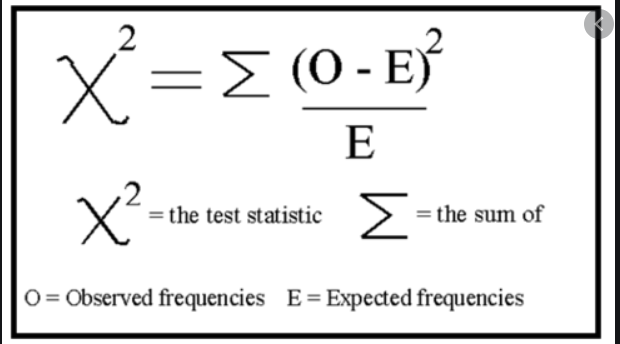

In [30]:
from IPython.display import Image
Image(filename='Chi-square_test.png')

In [32]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2/e for o,e in zip(Observed_values,expected_values)])
chi_square

array([0.00119737, 0.00073745])

In [33]:
chi_square_statastic=chi_square[0]+chi_square[1]

In [34]:
print("chi-square statstics:",chi_square_statastic)

chi-square statstics: 0.001934818536627623


In [35]:
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)

critical_value: 3.841458820694124


**Method1: by using the critical_value

In [38]:
if chi_square_statastic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Retain H0,There is no relationship between 2 categorical variables


**Method 2 by using the p-value

In [40]:
#p-value
p_value=1-chi2.cdf(x=chi_square_statastic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)

p-value: 0.964915107315732
Significance level:  0.05
Degree of Freedom:  1


## AI-Engineering

https://github.com/srivatsan88/YouTubeLI/blob/master/statistics/Statistical_Thinking_Feature_Selection_Categorical_Variables.ipynb

In [47]:
#,usecols=columns
df=pd.read_csv("churn_data_st.csv")
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'tenure', 'ServiceCount',
       'Contract', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')

customerID - Customer ID

Gender - Male or Female

SeniorCitizen - Whether the customer is a senior citizen or not (1, 0)

tenure - Number of months the customer has stayed with the company

ServiceCount - Number of services/product customer has availed

Contract - The contract term of the customer (Month-to-month, One year, Two year)

PaperlessBilling - Whether the customer has paperless billing or not (Yes, No)

MonthlyCharges - The amount charged to the customer monthly

TotalCharges - The total amount charged to the customer

Churn - Whether the customer churned or not (Yes or No)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   tenure            7043 non-null   int64  
 4   ServiceCount      7043 non-null   int64  
 5   Contract          7043 non-null   object 
 6   PaperlessBilling  7043 non-null   object 
 7   MonthlyCharges    7043 non-null   float64
 8   TotalCharges      7016 non-null   float64
 9   Churn             7043 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 550.4+ KB


In [49]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
tenure                73
ServiceCount           9
Contract               3
PaperlessBilling       2
MonthlyCharges      1585
TotalCharges        6514
Churn                  2
dtype: int64

<br>Null Hypothesis<br> - There is no relationship between two categorical values


<br>Alternate Hypothesis</br> - There is a relationship between the two categorical values



<br>
Questions we are going to answer through statistical test

Is there any relationship between user who have Churned to Gender of the user?

Is there any relationship between users who have opted for paperless billing to user who have churned?
</br>

In [50]:
df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

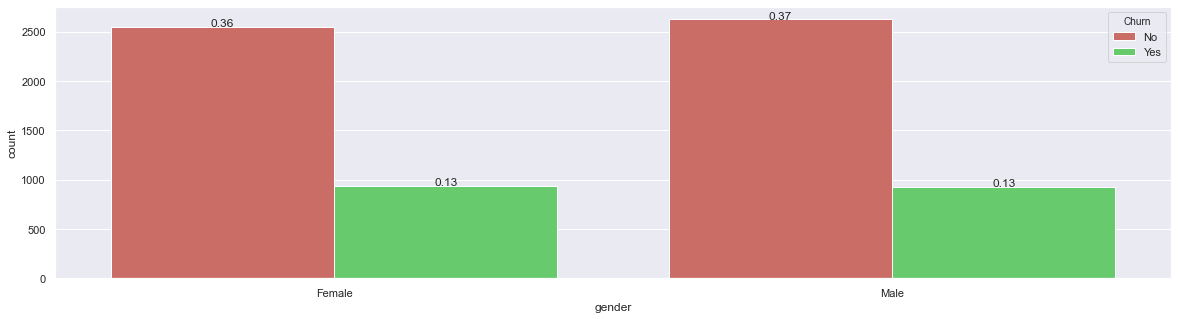

In [57]:
sns.set(style='darkgrid')
sns.set_palette('hls',3)
fig, ax=plt.subplots(figsize=(20,5))
ax=sns.countplot(x='gender',hue='Churn',data=df,)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:.2f}'.format(height/df.shape[0]),
            ha="center")

In [65]:
ax.patches

In [66]:
ax.patch

In [59]:
height = p.get_height()
height

930

In [60]:
p.get_x(),p.get_width()

(0.9999999999999999, 0.4000000000000001)

In [61]:
height/df.shape[0]

0.1320460031236689

##### **Note: Statistics alone cannot prove anything. All the tests we do are based on relative likelihood**

Means one needs to identify the extact alpha value based on the confidence you want to set it up

In [68]:
gender_churn=pd.crosstab(index=df['gender'],columns=df['Churn'])
gender_churn

Churn,No,Yes
gender,,
Female,2549,939
Male,2625,930


In [70]:
gender_churn.iloc[1].values

array([2625,  930], dtype=int64)

In [71]:
from scipy.stats import chi2_contingency

In [76]:
(chi_statistic,p,ddof,_)=chi2_contingency([gender_churn.iloc[0].values,gender_churn.iloc[1].values])

In [77]:
chi_statistic,p,ddof

(0.4840828822091383, 0.48657873605618596, 1)

In [85]:
df['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

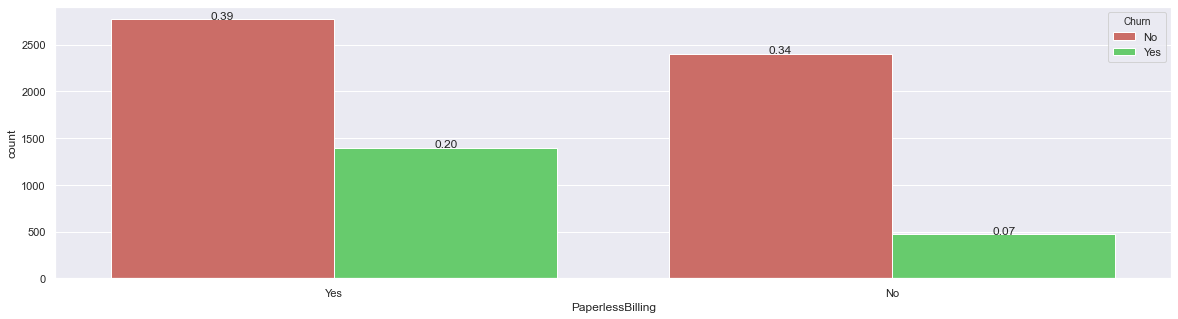

In [88]:
sns.set(style="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(20,5))
ax = sns.countplot(x="PaperlessBilling", hue="Churn", data=df)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/df.shape[0]),
            ha="center")

In [89]:
pb_churn_ct=pd.crosstab(index=df['PaperlessBilling'],columns=df['Churn'])

In [90]:
pb_churn_ct

Churn,No,Yes
PaperlessBilling,,
No,2403,469
Yes,2771,1400


In [91]:
pb_churn_ct.iloc[0].values

array([2403,  469], dtype=int64)

In [93]:
(chi2, p, dof,_) = chi2_contingency(pb_churn_ct.values)

In [95]:
print ("chi2     : " ,chi2)
print ("p-value  : " ,p)
print ("Degree for Freedom : " ,dof)

chi2     :  258.27764906707307
p-value  :  4.073354668665985e-58
Degree for Freedom :  1


#### Bhavesh- How Chi-sq test can be used in Kbest in feature selection

In [1]:
from sklearn.feature_selection import SelectKBest, chi2

In [5]:
accident_df = pd.read_excel('accident.xlsx')

In [6]:
df.head()

,is_adult,is_male,accident
0,1,0,1
1,1,1,1
2,1,1,0
3,1,1,0
4,1,0,0


In [7]:
adult_accident_crosstab = pd.crosstab(df['is_adult'], df['accident'], 
                                      margins=True)
adult_accident_crosstab

accident,0,1,All
is_adult,,,
1,781,146,927
All,781,146,927


In [8]:
gender_accident_crosstab = pd.crosstab(df['is_male'], df['accident'], 
                                       margins=True)
gender_accident_crosstab

accident,0,1,All
is_male,,,
0,154,47,201
1,627,99,726
All,781,146,927


In [11]:
def check_categorical_dependency(crosstab_table, confidence_interval):
    stat, p, dof, expected = chi2_contingency(crosstab_table)
    print ("Chi-Square Statistic value = {}".format(stat))
    print ("P - Value = {}".format(p))
    alpha = 1.0 - confidence_interval
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')
    return expected

In [12]:
exp_table_1 = check_categorical_dependency(adult_accident_crosstab, 0.95)

Chi-Square Statistic value = 0.0
P - Value = 1.0
Independent (fail to reject H0)


In [13]:
pd.DataFrame(exp_table_1)

,0,1,2
0,781.0,146.0,927.0
1,781.0,146.0,927.0


In [14]:
exp_table_2 = check_categorical_dependency(gender_accident_crosstab, 0.95)

Chi-Square Statistic value = 11.270043347013548
P - Value = 0.023691007358727482
Dependent (reject H0)


In [15]:
pd.DataFrame(exp_table_2)

,0,1,2
0,169.343042,31.656958,201.0
1,611.656958,114.343042,726.0
2,781.000000,146.000000,927.0


# Feature Selection using Chi-Square

In [16]:
X = df[["is_adult",	"is_male"]]

In [39]:
X

,is_adult,is_male
0,1,0
1,1,1
2,1,1
3,1,1
4,1,0
...,...,...
922,1,1
923,1,0
924,1,1
925,1,0


In [17]:
y = df[["accident"]]

In [20]:
y.shape

(927, 1)

In [18]:
X_new = SelectKBest(chi2, k=1).fit_transform(X, y)

In [19]:
X_new.shape

(927, 1)

In [22]:
#squeeze Remove single-dimensional entries from the shape of an array.
print(np.squeeze(X_new).shape)
pd.crosstab(np.squeeze(X_new), np.squeeze(y))

(927,)


accident,0,1
row_0,,
0,154,47
1,627,99


In [23]:
gender_accident_crosstab

accident,0,1,All
is_male,,,
0,154,47,201
1,627,99,726
All,781,146,927
